In [4]:
!pip install mplfinance #installing mplfinance to get Candle charts

import pandas as pd #importing pandas
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing matplotlib
import seaborn as sns #importing seaborn
import mplfinance as mpf  # importing mplfinance For candlestick charts

In [5]:
#attaching csv file path from google drive
file_path = "/content/drive/MyDrive/AXISBANK.csv"
stock_data = pd.read_csv(file_path, parse_dates=["Date"])

In [6]:
# Assigning the stock symbol 'UTIBANK' to the variable 'symbol'
symbol = "UTIBANK"
stock_data = stock_data[stock_data["Symbol"] == symbol]# Filtering the dataset to include only rows where the 'Symbol' column matches 'UTIBANK'

In [24]:
# Set the date as the index
stock_data.set_index("Date", inplace=True)
stock_data = stock_data.sort_index()

# Calculate Moving Averages
stock_data["SMA_10"] = stock_data["Close"].rolling(window=10).mean()
stock_data["SMA_20"] = stock_data["Close"].rolling(window=20).mean()

# Calculate Daily and Log Returns
stock_data["Daily_Return"] = stock_data["Close"].pct_change()
stock_data["Log_Return"] = np.log(stock_data["Close"] / stock_data["Close"].shift(1))

# Calculate Volatility (Rolling Standard Deviation of Log Returns)
stock_data["Volatility"] = stock_data["Log_Return"].rolling(window=10).std()

# Identify Buy/Sell Signals
stock_data["Signal"] = 0
stock_data.loc[stock_data["SMA_10"] > stock_data["SMA_20"], "Signal"] = 1  # Buy
stock_data.loc[stock_data["SMA_10"] < stock_data["SMA_20"], "Signal"] = -1  # Sell


KeyError: "None of ['Date'] are in the columns"

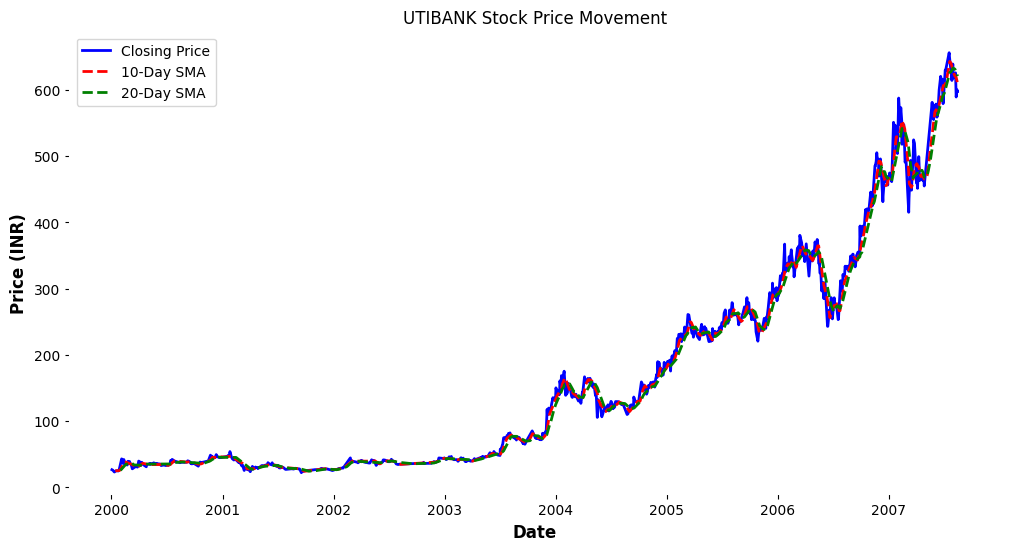

In [26]:
# --- STOCK PRICE MOVEMENT ---
plt.figure(figsize=(12, 6))  # Set figure size

plt.plot(stock_data["Close"], label="Closing Price", color="blue")
# Plot closing price

plt.plot(stock_data["SMA_10"], label="10-Day SMA", color="red", linestyle="dashed")
# Plot 10-day SMA (short-term trend)

plt.plot(stock_data["SMA_20"], label="20-Day SMA", color="green", linestyle="dashed")
# Plot 20-day SMA (long-term trend)

plt.title(f"{symbol} Stock Price Movement")  # Set dynamic title
plt.xlabel("Date")  # X-axis label
plt.ylabel("Price (INR)")  # Y-axis label

plt.legend()  # Show legend
plt.grid()  # Add grid
plt.show()  # Display plot


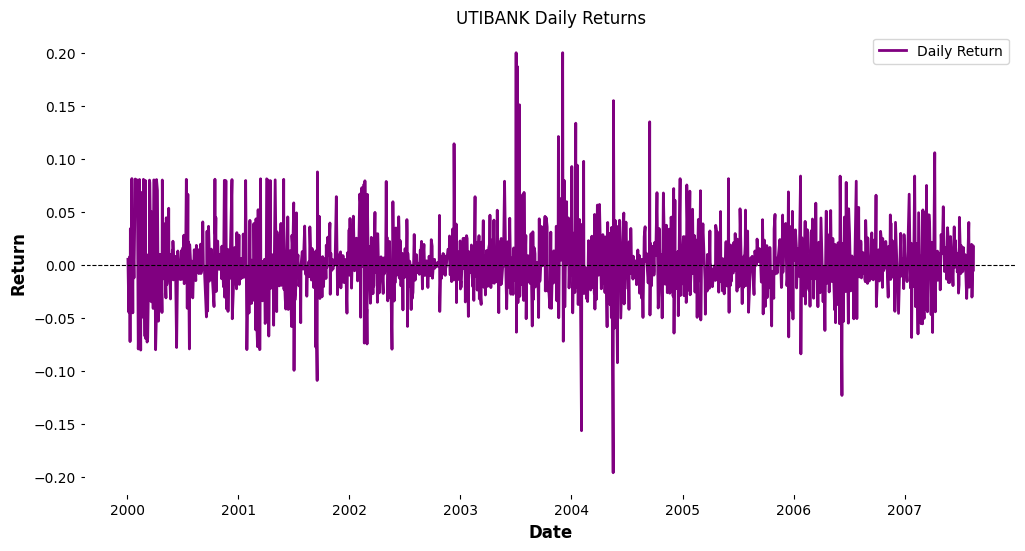

In [22]:
# --- DAILY RETURNS ---
plt.figure(figsize=(12, 6))  # Set figure size

plt.plot(stock_data["Daily_Return"], label="Daily Return", color="purple")
# Plot daily percentage returns

plt.axhline(0, linestyle="--", color="black", linewidth=0.8)
# Add a horizontal line at 0 to show positive/negative returns

plt.title(f"{symbol} Daily Returns")  # Set dynamic title
plt.xlabel("Date")  # X-axis label
plt.ylabel("Return")  # Y-axis label

plt.legend()  # Show legend
plt.grid()  # Add grid for clarity
plt.show()  # Display plot


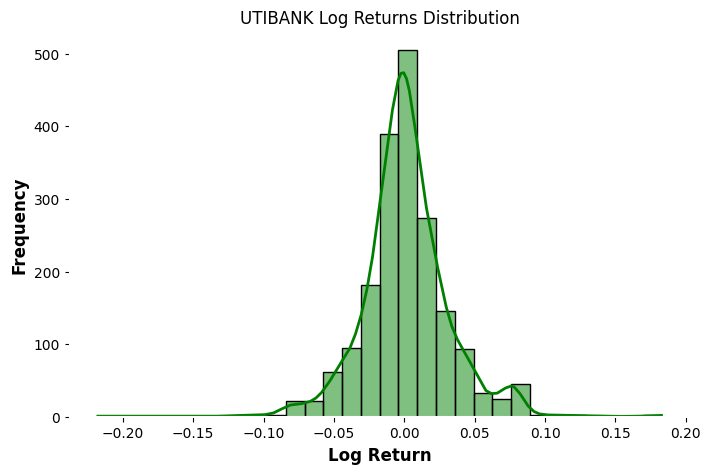

In [27]:
# --- LOG RETURNS DISTRIBUTION ---
plt.figure(figsize=(8, 5))  # Set figure size

sns.histplot(stock_data["Log_Return"].dropna(), bins=30, kde=True, color="green")
# Plot histogram of log returns with 30 bins and KDE (smooth curve)

plt.title(f"{symbol} Log Returns Distribution")  # Set dynamic title
plt.xlabel("Log Return")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label

plt.grid()  # Add grid
plt.show()  # Display plot


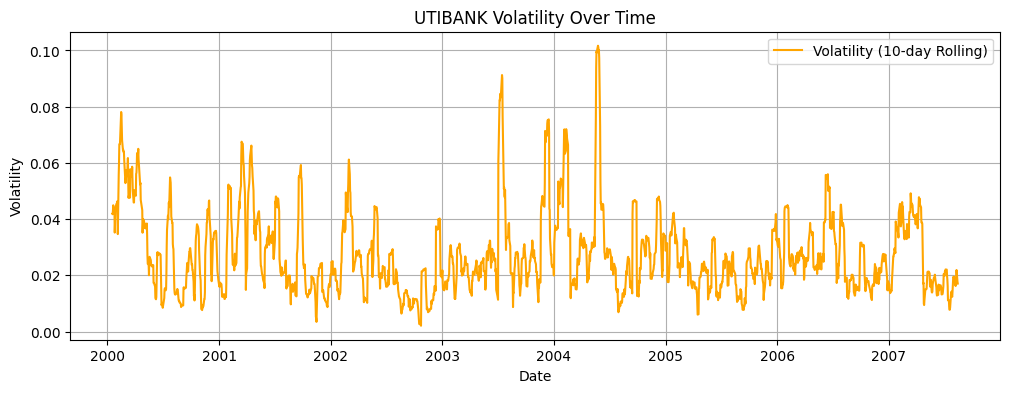

In [14]:
# --- VOLATILITY OVER TIME ---
plt.figure(figsize=(12, 4))  # Set figure size

plt.plot(stock_data["Volatility"], label="Volatility (10-day Rolling)", color="orange")
# Plot 10-day rolling volatility

plt.title(f"{symbol} Volatility Over Time")  # Set dynamic title
plt.xlabel("Date")  # X-axis label
plt.ylabel("Volatility")  # Y-axis label

plt.legend()  # Show legend
plt.grid()  # Add grid
plt.show()  # Display plot


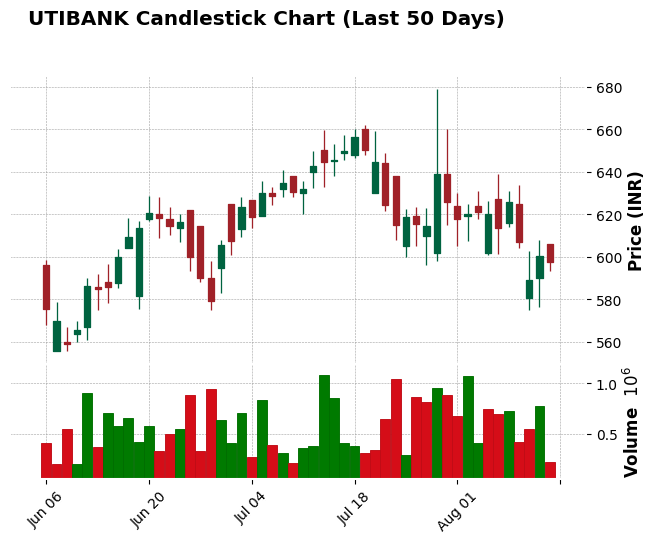

In [15]:
# --- CANDLESTICK CHART ---
mpf.plot(stock_data[-50:], type="candle", style="charles",
         title=f"{symbol} Candlestick Chart (Last 50 Days)",
         ylabel="Price (INR)", volume=True)
# Plot last 50 days as a candlestick chart with volume


In [28]:
# Print the last 10 rows of selected columns
print(stock_data[["Close", "SMA_10", "SMA_20", "Daily_Return",
                  "Log_Return", "Volatility", "Signal"]].tail(10))


             Close   SMA_10    SMA_20  Daily_Return  Log_Return  Volatility  \
Date                                                                          
2007-08-01  618.00  626.530  633.0100     -0.012622   -0.012702    0.019080   
2007-08-02  620.35  623.555  632.5275      0.003803    0.003795    0.019276   
2007-08-03  621.15  621.210  632.1475      0.001290    0.001289    0.019309   
2007-08-06  620.30  620.800  631.4375     -0.001368   -0.001369    0.016589   
2007-08-07  613.75  620.680  630.5900     -0.010559   -0.010616    0.016196   
2007-08-08  625.85  621.410  630.2850      0.019715    0.019523    0.017303   
2007-08-09  607.05  620.585  628.5100     -0.030039   -0.030500    0.019979   
2007-08-10  589.35  618.085  625.7375     -0.029157   -0.029591    0.021887   
2007-08-13  600.25  614.195  623.4625      0.018495    0.018326    0.017824   
2007-08-14  597.50  611.355  620.8525     -0.004581   -0.004592    0.017063   

            Signal  
Date                
2007-08-0